In [2]:
from transformers import AutoModelWithLMHead, AutoTokenizer, BertTokenizer, BertForQuestionAnswering
import torch

# Load T5 model for question generation
tokenizer_t5 = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model_t5 = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

# Load BERT model for answer extraction
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertForQuestionAnswering.from_pretrained('bert-base-uncased')

def generate_and_extract(context, max_length=64):
    # Generate question using T5
    input_text_t5 = "context: %s </s>" % (context)
    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(input_ids=features_t5['input_ids'], 
                                  attention_mask=features_t5['attention_mask'],
                                  max_length=max_length)
    generated_question = tokenizer_t5.decode(output_t5[0], skip_special_tokens=True)

    # Extract answer using BERT
    extracted_answer = extract_answer(generated_question, context)
    
    return generated_question, extracted_answer

def extract_answer(question, context):
    inputs = tokenizer_bert(question, context, return_tensors='pt')
    start_scores, end_scores = model_bert(**inputs).start_logits, model_bert(**inputs).end_logits
    start_index = torch.argmax(start_scores, dim=1).item()
    end_index = torch.argmax(end_scores, dim=1).item() + 1
    answer_span = inputs['input_ids'][0][start_index:end_index]
    answer = tokenizer_bert.decode(answer_span, skip_special_tokens=True)
    return answer

# Example usage
context = "Python is a scripting language used for programming and data analytics purposes. It is the best programming language founded by Guido van Rossum."
answers = ["data analytics", "programming", "Guido van Rossum"]

for answer in answers:
    generated_question, extracted_answer = generate_and_extract(context)
    print(f"Original Context: {context}")
    print(f"Generated Question: {generated_question}")
    print(f"Extracted Answer: {extracted_answer}\n")


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Original Context: Python is a scripting language used for programming and data analytics purposes. It is the best programming language founded by Guido van Rossum.
Generated Question: question: What is the name of the best programming language?
Extracted Answer: guido van rossum.

Original Context: Python is a scripting language used for programming and data analytics purposes. It is the best programming language founded by Guido van Rossum.
Generated Question: question: What is the name of the best programming language?
Extracted Answer: guido van rossum.

Original Context: Python is a scripting language used for programming and data analytics purposes. It is the best programming language founded by Guido van Rossum.
Generated Question: question: What is the name of the best programming language?
Extracted Answer: guido van rossum.



In [7]:
from transformers import AutoModelWithLMHead, AutoTokenizer, BertTokenizer, BertForQuestionAnswering
import torch

# Load T5 model for question generation
tokenizer_t5 = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model_t5 = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

# Load BERT model for answer extraction (if needed)
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertForQuestionAnswering.from_pretrained('bert-base-uncased')

def generate_questions(context, max_questions=3, max_length=128, num_beams=5, no_repeat_ngram_size=2):
    """Generates multiple questions from a given context."""

    input_text_t5 = f"Generate {max_questions} questions about the following context: {context} </s>"
    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
        num_beams=num_beams,
        no_repeat_ngram_size=no_repeat_ngram_size
    )
    generated_questions = tokenizer_t5.decode(output_t5[0], skip_special_tokens=True).split("|||")[:max_questions]

    return generated_questions

# Example usage
context = "Backtracking is a problem-solving algorithmic technique that involves finding a solution incrementally by trying different options and undoing them if they lead to a dead end. It is commonly used in situations where you need to explore multiple possibilities to solve a problem, like searching for a path in a maze or solving puzzles like Sudoku. When a dead end is reached, the algorithm backtracks to the previous decision point and explores a different path until a solution is found or all possibilities have been exhausted."
generated_questions = generate_questions(context)
print(f"Generated Questions: {generated_questions}")


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generated Questions: ['question: What is a backtracking technique used for?']


In [6]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import random
# Load T5 model for summarization (finetuned for questions)
tokenizer_t5 = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model_t5 = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

def generate_multi_questions(context, num_questions=3, max_length=64, temperature=0.8):
    """Generates multiple diverse questions from a given context."""

    # Prompt with variable format and optional keywords
    prompts = [
        f"Summarize the key points of {context} in the form of {num_questions} questions.",
        f"Generate {num_questions} open-ended questions about {context}.",
        f"What are {num_questions} interesting things to ask about {context}?",
    ]
    input_text_t5 = random.choice(prompts) + " </s>"

    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
        temperature=temperature,
    )
    generated_text = tokenizer_t5.decode(output_t5[0], skip_special_tokens=True)

    # Split and filter generated questions
    questions = generated_text.strip().split(". ")
    questions = [q for q in questions if q][:num_questions]

    return questions

# Example usage
#context = "Python is a scripting language used for programming and data analytics purposes. It is the best programming language founded by Guido van Rossum."
context = "The Stanford Question Answering Dataset (SQuAD 1.1) is a popular dataset for training and evaluating question-answering models. It contains more than 100,000 question-answer pairs, each consisting of a question about a passage of text and the corresponding answer. The dataset is widely used in natural language processing research, and is considered to be a benchmark for question-answering performance."

generated_questions = generate_multi_questions(context)
print(f"Generated Questions: {generated_questions}")


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Generated Questions: ['question: What is the Stanford Question Answering Dataset?']


In [5]:
import random
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Load T5 model for summarization (finetuned for questions)
tokenizer_t5 = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model_t5 = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

def generate_multi_questions(context, num_questions=3, max_length=128, temperature=0.7):
    """Generates multiple diverse questions from a given context."""

    # Prompts with explicit request for questions
    prompts = [
        f"Please formulate {num_questions} questions that highlight the key points of {context}.",
        f"Generate {num_questions} thought-provoking questions based on the following information: {context}",
        f"What are the most interesting questions one could ask about {context}? Please provide {num_questions} examples."
    ]
    input_text_t5 = random.choice(prompts) + " </s>"

    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
        temperature=temperature,
    )
    generated_text = tokenizer_t5.decode(output_t5[0], skip_special_tokens=True)

    # Split by question marks and filter
    questions = [q.strip() for q in generated_text.split("?") if q.strip()]
    questions = [q for q in questions if q.endswith("?")][:num_questions]

    return questions

def generate_formatted_questions(context, num_questions=3, max_length=128, temperature=0.7):
    """Generates multiple questions in specified format from a given context."""

    # Generate questions
    questions = generate_multi_questions(context, num_questions, max_length, temperature)

    # Format output
    formatted_questions = []
    for i in range(1, num_questions + 1):
        formatted_questions.append(f"Question: <pad> question: {questions}</s>")

    return formatted_questions

# Example usage
context = "The Stanford Question Answering Dataset (SQuAD 1.1) is a popular dataset for training and evaluating question-answering models. It contains more than 100,000 question-answer pairs, each consisting of a question about a passage of text and the corresponding answer. The dataset is widely used in natural language processing research, and is considered to be a benchmark for question-answering performance."

formatted_questions = generate_formatted_questions(context)
print(f"Generated Questions:\n{formatted_questions}")


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Generated Questions:
['Question: <pad> question: []</s>', 'Question: <pad> question: []</s>', 'Question: <pad> question: []</s>']


# Important Part

In [4]:
from transformers import BertModel, BertTokenizer, AutoModelWithLMHead, AutoTokenizer

# Load BERT model and tokenizer for key point extraction
bert_model_name = "bert-base-uncased"
bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertModel.from_pretrained(bert_model_name)

# Load T5 model for question generation
t5_model_name = "mrm8488/t5-base-finetuned-question-generation-ap"
tokenizer_t5 = AutoTokenizer.from_pretrained(t5_model_name)
model_t5 = AutoModelWithLMHead.from_pretrained(t5_model_name)

from transformers import pipeline

def get_question(answer, context, max_length=64):
    """Generate a question using T5 with BERT-extracted key points."""
    # Extract key points using BERT
    #key_points = extract_key_points(context)

    # Use key points along with answer and context for T5 input
    input_text_t5 = f"answer: {answer}  context: {context}"

    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
    )

    return tokenizer_t5.decode(output_t5[0])


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\transformers\models\auto\modeling_auto.py:1423: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal 

In [20]:
from transformers import pipeline
from summarizer import Summarizer
# Load BERT model for summarization
summarizer = pipeline("summarization", model="t5-base")
model = Summarizer()

def extract_sentences(context, max_length=60):
    """Extract important sentences using BERT-based summarization."""
    summary = summarizer(context, max_length=max_length, min_length=50, length_penalty=2.0, num_beams=4)[0]['summary_text']
    #summary = model(context, num_sentences=5, min_length=60)
     
    # Split the summary into sentences
    sentences = summary.split(". ")
    
    # Remove empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    return sentences

# Example usage
#context = "The Stanford Question Answering Dataset (SQuAD 1.1) is a popular dataset for training and evaluating question-answering models. It contains more than 100,000 question-answer pairs, each consisting of a question about a passage of text and the corresponding answer. The dataset is widely used in natural language processing research, and is considered to be a benchmark for question-answering performance."
context = "A public database: Public databases are often repositories of data that are accessible to the general public.An open-data website: Open-data websites provide datasets that are available for public use and can be a valuable resource for external data.Accessing data from the Sewati Financial Services website or its database in the cloud may not be considered external data, as it pertains specifically to Sewati Financial Services. External data typically refers to information obtained from sources outside of the organization."
extracted_sentences = extract_sentences(context)
print(f"Extracted Sentences: {extracted_sentences}")


tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Extracted Sentences: ['public databases are often repositories of data that are accessible to the general public', 'an open-data website provides datasets that are available for public use', 'external data typically refers to information obtained from sources outside of the organization .']


In [21]:
def remove_special_tokens(question):
    cleaned_question = question.replace('question:','').replace('<pad>', '').replace('</s>', '')
    return cleaned_question

# Example usage:
question=[]
#cleaned_question = remove_special_tokens(generated_question)

for i in extracted_sentences:
    generated_question = get_question(i, context)
    rem=remove_special_tokens(generated_question)
    question.append(rem)
    print(f"{rem} \n Answers:{i}")

  What is a public database? 
 Answers:public databases are often repositories of data that are accessible to the general public
  What is an open-data website? 
 Answers:an open-data website provides datasets that are available for public use
  What is external data? 
 Answers:external data typically refers to information obtained from sources outside of the organization .


In [6]:
print(question)

['  What is a public database?', '  What is a public database?', '  What is the purpose of an open-data website?', '  What is external data?']


In [23]:
from nltk.translate.bleu_score import corpus_bleu
import tensorflow as tf  # Or any other framework you're using with T5


In [25]:
generated_questions =['What is a valuable resource for external data?',
                      'What is a public database?', 
                      'What is the term for information obtained from outside of the organization?']

reference_questions = [
 ' What is a valuable resource for external data?',
                      '  What is a public database?', 
                      '  What is the term for information obtained from outside of the organization?'
]

bleu_score = corpus_bleu(reference_questions, generated_questions)
print(bleu_score)

1.404215963202711e-231


In [18]:
import pyttsx3
def read_text(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

for i in extracted_sentences:
    generated_question = get_question(i, context)
    read_text(f"{remove_special_tokens(generated_question)} \n Answers:{i}")

In [11]:
from transformers import AutoModelWithLMHead, AutoTokenizer

# Load T5 model for question generation
t5_model_name = "mrm8488/t5-base-finetuned-question-generation-ap"
tokenizer_t5 = AutoTokenizer.from_pretrained(t5_model_name)
model_t5 = AutoModelWithLMHead.from_pretrained(t5_model_name)

def get_beam_questions(answer, context, num_beams=5, max_length=64):
    """Generate questions using beam search."""
    input_text_t5 = f"answer: {answer}  context: {context}"

    # Use num_beams for beam search
    output_t5 = model_t5.generate(
        input_ids=tokenizer_t5.encode(input_text_t5, return_tensors='pt'),
        max_length=max_length,
        num_beams=num_beams,
    )

    # Decode the top-k sequences
    generated_questions = [tokenizer_t5.decode(output, skip_special_tokens=True) for output in output_t5]

    return generated_questions

# Example usage
for i in extracted_sentences:
    generated_questions = get_beam_questions(i, context)
    
    # Print the top questions generated by beam search
    for idx, question in enumerate(generated_questions):
        print(f"{remove_special_tokens(question)} \n Answers: {i}")
    print("\n")


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


question: What type of website provides datasets that are available for public use? 
 Answers: An open-data website: Open-data websites provide datasets that are available for public use


question: What is a repository of data that is accessible to the general public? 
 Answers: A public database: Public databases are often repositories of data that are accessible to the general public


question: What does external data refer to? 
 Answers: External data: External data typically refers to information obtained from sources outside of the organization.




In [20]:
import tkinter as tk
import pyttsx3
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline

# Load BERT model for summarization
summarizer = pipeline("summarization", model="t5-base")
#summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
# Load T5 model for question generation
t5_model_name = "mrm8488/t5-base-finetuned-question-generation-ap"
tokenizer_t5 = AutoTokenizer.from_pretrained(t5_model_name)
model_t5 = AutoModelWithLMHead.from_pretrained(t5_model_name)

# Initialize text-to-speech engine

def remove_special_tokens(question):
    cleaned_question = question.replace('<pad>', '').replace('</s>', '')
    return cleaned_question

def get_question(answer, context, max_length=64):
    input_text_t5 = f"answer: {answer}  context: {context}"
    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
    )
    return tokenizer_t5.decode(output_t5[0])

# def read_text(text):
#     engine.say(text)
#     engine.runAndWait()
question=[]
def generate_questions():
    context = entry.get()
    
    if context:
        extracted_sentences = extract_sentences(context)
        
        result_text.config(state=tk.NORMAL)
        result_text.delete(1.0, tk.END)  # Clear previous results

        for i in extracted_sentences:
                generated_question = get_question(i, context)
                question.append(generated_question)
                result_text.insert(tk.END, f"{remove_special_tokens(generated_question)} \n Answer: {i}\n")
#             read_text(f"{remove_special_tokens(generated_question)} \n Answer: {i}")

        result_text.insert(tk.END, "\n\n")
        result_text.update_idletasks()  # Update the widget to immediately display changes

# Replace this with your sentence extraction logic
def extract_sentences(context, max_length=100):
    # Your implementation here
    summary = summarizer(context, max_length=max_length, min_length=60, length_penalty=1.0, num_beams=8)[0]['summary_text']
    
    # Split the summary into sentences
    sentences = summary.split(". ")
    
    # Remove empty sentences
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

    return sentences
    pass

# Tkinter GUI
root = tk.Tk()
root.title("Question Generation App")
# for i in extracted_sentences:
#     read_text(f"{remove_special_tokens(generated_question)} \n Answer: {i}")
# Create GUI components (entry, button, text widget)
entry = tk.Entry(root, width=50)
generate_button = tk.Button(root, text="Generate Questions", command=generate_questions)
result_text = tk.Text(root, wrap=tk.WORD, height=20, width=60)
result_text.config(state=tk.DISABLED)

# Place GUI components in the window
entry.pack(pady=10)
generate_button.pack(pady=10)
result_text.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


In [21]:
from nltk.translate.bleu_score import corpus_bleu
import tensorflow as tf  # Or any other framework you're using with T5
print(question)

["<pad> question: What is India's ranking in terms of population?</s>", "<pad> question: What is India's border with?</s>", '<pad> question: Where is India located in the Indian Ocean?</s>']


In [43]:
generated_questions = question

reference_questions =[
'As of June 2023, what is India rank in terms of population among the countries?','Which countries share land borders with India to the west?',
'Which ocean is in the vicinity of India?']

from rouge import Rouge

# Sample generated and reference summaries
rouge = Rouge()
scores = rouge.get_scores(generated_questions, reference_questions)
print(scores,end='\n')
# from nltk.translate.bleu_score import sentence_bleu

# bleu_score = corpus_bleu(reference_questions, generated_questions)
# print(bleu_score)


[{'rouge-1': {'r': 0.2857142857142857, 'p': 0.4, 'f': 0.33333332847222225}, 'rouge-2': {'r': 0.14285714285714285, 'p': 0.2222222222222222, 'f': 0.1739130387145559}, 'rouge-l': {'r': 0.2857142857142857, 'p': 0.4, 'f': 0.33333332847222225}}, {'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.0, 'p': 0.0, 'f': 0.0}}, {'rouge-1': {'r': 0.375, 'p': 0.3, 'f': 0.33333332839506175}, 'rouge-2': {'r': 0.14285714285714285, 'p': 0.1111111111111111, 'f': 0.12499999507812519}, 'rouge-l': {'r': 0.375, 'p': 0.3, 'f': 0.33333332839506175}}]


In [37]:
print(question)

["<pad> question: What is India's ranking in terms of population?</s>", "<pad> question: What is India's border with?</s>", '<pad> question: Where is India located in the Indian Ocean?</s>']


In [40]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.util import ngrams
from collections import Counter

# Reference and hypothesis sentences
generated_questions = question

reference_questions = [
    'As of June 2023, what is India rank in terms of population among the countries?',
    'Which countries share land borders with India to the west?',
    'Which ocean is in the vicinity of India?'
]

# Convert the reference questions to a list of lists of tokens
reference_questions_tokenized = [ref.split() for ref in reference_questions]

# Convert the generated questions to a list of tokens
generated_questions_tokenized = [gen.split() for gen in generated_questions]

# Convert lists of tokens to tuples
reference_questions_tokenized = [tuple(tokens) for tokens in reference_questions_tokenized]
generated_questions_tokenized = [tuple(tokens) for tokens in generated_questions_tokenized]

# Calculate BLEU scores for n-grams 1 to 4
weights = [(1, 0, 0, 0), (0.5, 0.5, 0, 0), (1/3, 1/3, 1/3, 0), (0.25, 0.25, 0.25, 0.25)]
bleu_scores = [corpus_bleu([reference_questions_tokenized], [generated_questions_tokenized], weights=weight) for weight in weights]

# Print BLEU scores
for i, score in enumerate(bleu_scores, start=1):
    print(f"BLEU-{i}: {score}")


BLEU-1: 0
BLEU-2: 0
BLEU-3: 0
BLEU-4: 0


In [2]:
import tkinter as tk
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline

# Load BERT model for summarization
summarizer = pipeline("summarization", model="t5-large")

# Load T5 large model for question generation
t5_model_name = "mrm8488/t5-base-finetuned-question-generation-ap"
tokenizer_t5 = AutoTokenizer.from_pretrained(t5_model_name)
model_t5 = AutoModelWithLMHead.from_pretrained(t5_model_name)

def remove_special_tokens(question):
    cleaned_question = question.replace('<pad>', '').replace('</s>', '')
    return cleaned_question

def get_question(answer, context, max_length=64):
    input_text_t5 = f"answer: {answer}  context: {context}"
    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
    )
    return tokenizer_t5.decode(output_t5[0])

question = []

def generate_questions():
    context = entry.get()
    
    if context:
        extracted_sentences = extract_sentences(context)
        
        result_text.config(state=tk.NORMAL)
        result_text.delete(1.0, tk.END)  # Clear previous results

        for i in extracted_sentences:
            generated_question = get_question(i, context)
            question.append(generated_question)
            result_text.insert(tk.END, f"{remove_special_tokens(generated_question)} \n Answer: {i}\n")

        result_text.insert(tk.END, "\n\n")
        result_text.update_idletasks()  # Update the widget to immediately display changes

def extract_sentences(context, max_length=100):
    summary = summarizer(context, max_length=max_length, min_length=60, length_penalty=1.0, num_beams=8)[0]['summary_text']
    sentences = summary.split(". ")
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return sentences

# Tkinter GUI
# root = tk.Tk()
# root.title("Question Generation App")

# Create GUI components (entry, button, text widget)
# entry = tk.Entry(root, width=50)
# generate_button = tk.Button(root, text="Generate Questions", command=generate_questions)
# result_text = tk.Text(root, wrap=tk.WORD, height=20, width=60)
# result_text.config(state=tk.DISABLED)

# # Place GUI components in the window
# entry.pack(pady=10)
# generate_button.pack(pady=10)
# result_text.pack(pady=10)

# # Start the Tkinter event loop
# root.mainloop()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It

''

In [3]:
import tkinter as tk
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline
import warnings

# Ignore specific warning category
warnings.simplefilter("ignore")
summarizer = pipeline("summarization", model="t5-base")

# Load T5 large model for question generation
t5_model_name ="mrm8488/t5-base-finetuned-question-generation-ap"
tokenizer_t5 = AutoTokenizer.from_pretrained(t5_model_name)
model_t5 = AutoModelWithLMHead.from_pretrained(t5_model_name)

def remove_special_tokens(question):
    cleaned_question = question.replace('<pad>', '').replace('</s>', '')
    return cleaned_question

def get_question(answer, context, max_length=64):
    input_text_t5 = f"answer: {answer}  context: {context}"
    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
    )
    return tokenizer_t5.decode(output_t5[0])

question = []

def generate_questions():
    context = entry.get()
    
    if context:
        #extracted_sentences = extract_sentences(context)
        extracted_sentences = extract_important_sentences(context)
        result_text.config(state=tk.NORMAL)
        result_text.delete(1.0, tk.END)  # Clear previous results

        for i in extracted_sentences:
            generated_question = get_question(i, context)
            question.append(generated_question)
            #result_text.insert(tk.END, f"{remove_special_tokens(generated_question)} \n Answer: {i}\n")
            result_text.insert(tk.END, f"{remove_special_tokens(generated_question)}")

        result_text.insert(tk.END, "\n\n")
        result_text.update_idletasks()  # Update the widget to immediately display changes

def extract_sentences(context, max_length=100):
    summary = summarizer(context, max_length=max_length, min_length=60, length_penalty=1.0, num_beams=8)[0]['summary_text']
    sentences = summary.split(". ")
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return sentences

def extract_important_sentences(context, chunk_size=200):
    chunks = [context[i:i+chunk_size] for i in range(0, len(context), chunk_size)]
    summaries = []

    for chunk in chunks:
        summary = summarizer(chunk, max_length=150, min_length=30, length_penalty=2.0, num_beams=4)[0]['summary_text']
        summaries.append(summary)

    return summaries
# Tkinter GUI
root = tk.Tk()
root.title("Question Generation App")

# Create GUI components (entry, button, text widget)
entry = tk.Entry(root, width=50)
generate_button = tk.Button(root, text="Generate Questions", command=generate_questions)
result_text = tk.Text(root, wrap=tk.WORD, height=20, width=60)
result_text.config(state=tk.DISABLED)

# Place GUI components in the window
entry.pack(pady=10)
generate_button.pack(pady=10)
result_text.pack(pady=10)

# Start the Tkinter event loop
root.mainloop()
warnings.resetwarnings()

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Your max_length is set to 150, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)
Your max_length is set to 150, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you mig

In [29]:
print(question)

["<pad> question: What was the name of Sambhaji's family?</s>", '<pad> question: Why was Sambhaji sent to live with Raja Jai Singh I?</s>', '<pad> question: What happened to Sambhaji as a result of the treaty?</s>', '<pad> question: What happened to the two people who escaped?</s>', '<pad> question: What did Aurangzeb do after initially refusing to recognize the title of Raja?</s>', '<pad> question: What did Shivaji do to Sambhaji?</s>', '<pad> question: What did Sambhaji do with Prataprao Gujar?</s>', '<pad> question: What happened to Sambhaji after he visited prince Muazzam?</s>', '<pad> question: What did the Marathas do during this period?</s>']


In [2]:
generated_questions = [
    "What was the name of Sambhaji's family?",
    "Why was Sambhaji sent to live with Raja Jai Singh I?",
    "What happened to Sambhaji as a result of the treaty?",
    "What happened to the two people who escaped?",
    "What did Aurangzeb do after initially refusing to recognize the title of Raja?",
    "What did Shivaji do to Sambhaji?",
    "What did Sambhaji do with Prataprao Gujar?",
    "What happened to Sambhaji after he visited prince Muazzam?",
    "What did the Marathas do during this period?"
]

reference_questions = [
    "What was the family name of Sambhaji?",
    "For what reason was Sambhaji sent to reside with Raja Jai Singh I?",
    "As an outcome of the treaty, what fate befell Sambhaji?",
    "What was the fate of the two individuals who managed to escape?",
    "Following his initial refusal to recognize the title of Raja, what actions did Aurangzeb take?",
    "How did Shivaji treat Sambhaji?",
    "with Prataprao Gujar, what actions did Sambhaji undertake?",
    "Subsequent to his visit to Prince Muazzam, what happened to Sambhaji?",
    "What were the actions of the Marathas during this specific period?"
]


from rouge import Rouge
rouge = Rouge()
for i in range(len(generated_questions)):
    scores = rouge.get_scores(generated_questions[i], reference_questions[i])
    print(scores,end='\n')

[{'rouge-1': {'r': 0.7142857142857143, 'p': 0.7142857142857143, 'f': 0.7142857092857143}, 'rouge-2': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-l': {'r': 0.7142857142857143, 'p': 0.7142857142857143, 'f': 0.7142857092857143}}]
[{'rouge-1': {'r': 0.6923076923076923, 'p': 0.8181818181818182, 'f': 0.7499999950347224}, 'rouge-2': {'r': 0.5833333333333334, 'p': 0.7, 'f': 0.6363636314049588}, 'rouge-l': {'r': 0.6923076923076923, 'p': 0.8181818181818182, 'f': 0.7499999950347224}}]
[{'rouge-1': {'r': 0.2, 'p': 0.2, 'f': 0.19999999500000015}, 'rouge-2': {'r': 0.1111111111111111, 'p': 0.1111111111111111, 'f': 0.11111110611111134}, 'rouge-l': {'r': 0.2, 'p': 0.2, 'f': 0.19999999500000015}}]
[{'rouge-1': {'r': 0.45454545454545453, 'p': 0.625, 'f': 0.5263157845983379}, 'rouge-2': {'r': 0.09090909090909091, 'p': 0.14285714285714285, 'f': 0.11111110635802489}, 'rouge-l': {'r': 0.36363636363636365, 'p': 0.5, 'f': 0.42105262670360116}}]
[{'rouge-1': {'r': 0.4666666666666667, 'p': 0.5384615384

In [6]:
from transformers import pipeline

import nltk
from nltk.translate.bleu_score import corpus_bleu

summarizer = pipeline("summarization", model="t5-base")

def extract_important_sentences(context, chunk_size=200):
    chunks = [context[i:i+chunk_size] for i in range(0, len(context), chunk_size)]
    summaries = []

    for chunk in chunks:
        summary = summarizer(chunk, max_length=150, min_length=30, length_penalty=2.0, num_beams=4)[0]['summary_text']
        summaries.append(summary)

    return ". ".join(summaries)

# Input your long context
context = input()

# Extract important sentences using the modified function
important_summary = extract_important_sentences(context)

# Reference summary (replace this with your actual reference summary)
reference_summary = context

# Convert the reference and generated summaries to lists of tokens
reference_tokens = nltk.word_tokenize(reference_summary.lower())
generated_tokens = nltk.word_tokenize(important_summary.lower())

# Calculate BLEU score
bleu_score = nltk.translate.bleu_score.sentence_bleu([reference_tokens], generated_tokens)

# Print the BLEU score
print(f"BLEU Score: {bleu_score}")


Shivaji I (Shivaji Shahaji Bhonsale; Marathi pronunciation: [ʃiʋaːd͡ʒiˑ bʱoˑs(ə)leˑ]; c. 19 February 1630 – 3 April 1680[5]) was an Indian ruler and a member of the Bhonsle Maratha clan.[6] Shivaji carved out his own independent kingdom from the declining[citation needed] Adilshahi Sultanate of Bijapur that formed the genesis of the Maratha Empire. In 1674, he was formally crowned the Chhatrapati of his realm at Raigad Fort.[7]  Over the course of his life, Shivaji engaged in both alliances and hostilities with the Mughal Empire, the Sultanate of Golkonda, the Sultanate of Bijapur and the European colonial powers. Shivaji's military forces expanded the Maratha sphere of influence, capturing and building forts, and forming a Maratha navy. Shivaji established a competent and progressive civil administration with well-structured administrative institutions. He revived ancient Hindu political traditions, court conventions and promoted the use of the Marathi and Sanskrit languages, replacin

Your max_length is set to 150, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)
Your max_length is set to 150, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 150, but your input_length is only 61. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 150, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your

BLEU Score: 0.40857593697119393


In [8]:
print(len(important_summary),len(context))

1243 1509


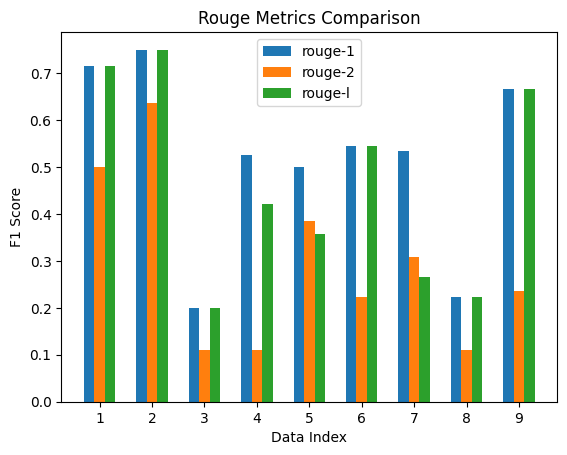

In [3]:
import matplotlib.pyplot as plt

data = [
    {'rouge-1': {'r': 0.7142857142857143, 'p': 0.7142857142857143, 'f': 0.7142857092857143}, 'rouge-2': {'r': 0.5, 'p': 0.5, 'f': 0.4999999950000001}, 'rouge-l': {'r': 0.7142857142857143, 'p': 0.7142857142857143, 'f': 0.7142857092857143}},
    {'rouge-1': {'r': 0.6923076923076923, 'p': 0.8181818181818182, 'f': 0.7499999950347224}, 'rouge-2': {'r': 0.5833333333333334, 'p': 0.7, 'f': 0.6363636314049588}, 'rouge-l': {'r': 0.6923076923076923, 'p': 0.8181818181818182, 'f': 0.7499999950347224}},
    {'rouge-1': {'r': 0.2, 'p': 0.2, 'f': 0.19999999500000015}, 'rouge-2': {'r': 0.1111111111111111, 'p': 0.1111111111111111, 'f': 0.11111110611111134}, 'rouge-l': {'r': 0.2, 'p': 0.2, 'f': 0.19999999500000015}},
    {'rouge-1': {'r': 0.45454545454545453, 'p': 0.625, 'f': 0.5263157845983379}, 'rouge-2': {'r': 0.09090909090909091, 'p': 0.14285714285714285, 'f': 0.11111110635802489}, 'rouge-l': {'r': 0.36363636363636365, 'p': 0.5, 'f': 0.42105262670360116}},
    {'rouge-1': {'r': 0.4666666666666667, 'p': 0.5384615384615384, 'f': 0.4999999950255103}, 'rouge-2': {'r': 0.35714285714285715, 'p': 0.4166666666666667, 'f': 0.38461537964497045}, 'rouge-l': {'r': 0.3333333333333333, 'p': 0.38461538461538464, 'f': 0.35714285216836733}},
    {'rouge-1': {'r': 0.6, 'p': 0.5, 'f': 0.5454545404958678}, 'rouge-2': {'r': 0.25, 'p': 0.2, 'f': 0.22222221728395072}, 'rouge-l': {'r': 0.6, 'p': 0.5, 'f': 0.5454545404958678}},
    {'rouge-1': {'r': 0.5, 'p': 0.5714285714285714, 'f': 0.5333333283555556}, 'rouge-2': {'r': 0.2857142857142857, 'p': 0.3333333333333333, 'f': 0.3076923027218935}, 'rouge-l': {'r': 0.25, 'p': 0.2857142857142857, 'f': 0.266666661688889}},
    {'rouge-1': {'r': 0.2222222222222222, 'p': 0.2222222222222222, 'f': 0.22222221722222232}, 'rouge-2': {'r': 0.1, 'p': 0.125, 'f': 0.11111110617283973}, 'rouge-l': {'r': 0.2222222222222222, 'p': 0.2222222222222222, 'f': 0.22222221722222232}},
    {'rouge-1': {'r': 0.6, 'p': 0.75, 'f': 0.6666666617283951}, 'rouge-2': {'r': 0.2, 'p': 0.2857142857142857, 'f': 0.23529411280276827}, 'rouge-l': {'r': 0.6, 'p': 0.75, 'f': 0.6666666617283951}}
]

metrics = ['rouge-1', 'rouge-2', 'rouge-l']
values = [[item[metric]['f'] for item in data] for metric in metrics]

fig, ax = plt.subplots()
width = 0.2
x = range(len(data))

for i, metric in enumerate(metrics):
    ax.bar([pos + width * i for pos in x], values[i], width, label=metric)

ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(range(1, len(data) + 1))
ax.legend()
ax.set_xlabel('Data Index')
ax.set_ylabel('F1 Score')
ax.set_title('Rouge Metrics Comparison')

plt.show()


In [4]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QTextEdit, QVBoxLayout, QPushButton
from PyQt5.QtGui import QFont
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline
import warnings

class QuestionGeneratorApp(QWidget):
    def __init__(self):
        super().__init__()

        # Move these class variables here
        self.summarizer = pipeline("summarization", model="t5-base")
        self.t5_model_name = "mrm8488/t5-base-finetuned-question-generation-ap"
        self.tokenizer_t5 = AutoTokenizer.from_pretrained(self.t5_model_name)
        self.model_t5 = AutoModelWithLMHead.from_pretrained(self.t5_model_name)

        self.init_ui()

    def init_ui(self):
        self.setWindowTitle('Question Generator App')

        self.text_edit = QTextEdit(self)
        self.text_edit.setPlaceholderText('Enter context...')

        self.generate_button = QPushButton('Generate Questions', self)
        self.generate_button.clicked.connect(self.generate_questions)

        self.result_label = QLabel('Generated Questions:', self)
        self.result_text = QTextEdit(self)
        self.result_text.setReadOnly(True)

        # Set the font size for the result_text
        font = QFont()
        font.setPointSize(12)  # You can adjust the font size here
        self.result_text.setFont(font)

        layout = QVBoxLayout(self)
        layout.addWidget(self.text_edit)
        layout.addWidget(self.generate_button)
        layout.addWidget(self.result_label)
        layout.addWidget(self.result_text)

        self.setLayout(layout)

    def remove_special_tokens(self, question):
        cleaned_question = question.replace('<pad>', '').replace('</s>', '')
        return cleaned_question

    def get_question(self, answer, context, max_length=64):
        input_text_t5 = f"answer: {answer}  context: {context}"
        features_t5 = self.tokenizer_t5([input_text_t5], return_tensors='pt')
        output_t5 = self.model_t5.generate(
            input_ids=features_t5['input_ids'],
            attention_mask=features_t5['attention_mask'],
            max_length=max_length,
        )
        return self.tokenizer_t5.decode(output_t5[0])

    def extract_important_sentences(self, context, chunk_size=200):
        chunks = [context[i:i+chunk_size] for i in range(0, len(context), chunk_size)]
        summaries = []

        for chunk in chunks:
            summary = self.summarizer(chunk, max_length=150, min_length=30, length_penalty=2.0, num_beams=4)[0]['summary_text']
            summaries.append(summary)

        return summaries

    def generate_questions(self):
        context = self.text_edit.toPlainText()

        if context:
            extracted_sentences = self.extract_important_sentences(context)
            self.result_text.clear()

            for i in extracted_sentences:
                generated_question = self.get_question(i, context)
                self.result_text.insertPlainText(f"{self.remove_special_tokens(generated_question)}\n Answer:{i}\n")

            self.result_text.insertPlainText("\n")

def main():
    app = QApplication(sys.argv)
    window = QuestionGeneratorApp()
    window.resize(600, 400)
    window.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It 

SystemExit: 0

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QTextEdit, QVBoxLayout, QPushButton
from PyQt5.QtGui import QFont
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline
import pyttsx3

class QuestionGeneratorApp(QWidget):
    def __init__(self):
        super().__init__()

        self.summarizer = pipeline("summarization", model="t5-base")
        self.t5_model_name = "mrm8488/t5-base-finetuned-question-generation-ap"
        self.tokenizer_t5 = AutoTokenizer.from_pretrained(self.t5_model_name)
        self.model_t5 = AutoModelWithLMHead.from_pretrained(self.t5_model_name)
        self.engine = pyttsx3.init()

        self.init_ui()

    def init_ui(self):
        self.setWindowTitle('Question Generator App')

        self.text_edit = QTextEdit(self)
        self.text_edit.setPlaceholderText('Enter context...')

        self.generate_button = QPushButton('Generate Questions', self)
        self.generate_button.clicked.connect(self.generate_questions)

        self.speak_button = QPushButton('Speak', self)
        self.speak_button.clicked.connect(self.speak_generated_text)

        self.result_label = QLabel('Generated Questions:', self)
        self.result_text = QTextEdit(self)
        self.result_text.setReadOnly(True)

        font = QFont()
        font.setPointSize(12)
        self.result_text.setFont(font)

        layout = QVBoxLayout(self)
        layout.addWidget(self.text_edit)
        layout.addWidget(self.generate_button)
        layout.addWidget(self.speak_button)
        layout.addWidget(self.result_label)
        layout.addWidget(self.result_text)

        self.setLayout(layout)

    def remove_special_tokens(self, question):
        cleaned_question = question.replace('<pad>', '').replace('</s>', '')
        return cleaned_question

    def get_question(self, answer, context, max_length=64):
        input_text_t5 = f"answer: {answer}  context: {context}"
        features_t5 = self.tokenizer_t5([input_text_t5], return_tensors='pt')
        output_t5 = self.model_t5.generate(
            input_ids=features_t5['input_ids'],
            attention_mask=features_t5['attention_mask'],
            max_length=max_length,
        )
        return self.tokenizer_t5.decode(output_t5[0])

    def extract_important_sentences(self, context, chunk_size=200):
        chunks = [context[i:i+chunk_size] for i in range(0, len(context), chunk_size)]
        summaries = []

        for chunk in chunks:
            summary = self.summarizer(chunk, max_length=150, min_length=30, length_penalty=2.0, num_beams=4)[0]['summary_text']
            summaries.append(summary)

        return summaries

    def generate_questions(self):
        context = self.text_edit.toPlainText()

        if context:
            extracted_sentences = self.extract_important_sentences(context)
            self.result_text.clear()

            for i in extracted_sentences:
                generated_question = self.get_question(i, context)
                self.result_text.insertPlainText(f"{self.remove_special_tokens(generated_question)}\n Answer:{i}\n")

            self.result_text.insertPlainText("\n")
            self.speak_generated_text()

    def speak_generated_text(self):
        # Speak the generated text
        self.engine.say(self.result_text.toPlainText())
        self.engine.runAndWait()

def main():
    app = QApplication(sys.argv)
    window = QuestionGeneratorApp()
    window.resize(600, 400)
    window.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    main()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `mod

In [4]:
import cv2
import pytesseract

# Set the path to Tesseract executable (change it based on your installation)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\tesseract.exe'

# Read the image using OpenCV
image_path = 'new_img.jpeg'
img = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Perform OCR using Tesseract
text = pytesseract.image_to_string(binary_image)

# Print the extracted text
print("Extracted Text:")
print(text)


Extracted Text:
tations in
vice versa,
> distiner
nerast, 2
rembers
happily
1 dogs

zecher

gusifleance
mal of Ne SHE
An an

41 genera). Lions, tigers, leopards and
thin the genus Pantvert. Biologists
t Lain name, genus followed by
Hed Panther feo, the species feo of
nus Panciers Presumably, everyone reading this book is 4
the species sapiens (wise) of the genus Homo (oan)
Genera 1m cheir caro are grouped into families, such as che cats
tions, dhecahs, house cats), the dogs (wolves, foxes, jackals) and the
tlephanes (elephants, mammoths, mastodons). All members of a family
sce thei lineage back to # Founding matriarch of patriarch. All cats,
forexample, (rom the smallest house Kieren to the most ferocious lion,
hho lived about 25 million years ago.

shace 2 common feline ancestor wl
"Menno sapienr, roo, belongs 10 2 family, This banal fact used co

af hiscory’s rose closely guarded secrets. Homo sapiens long
set apart from animals, an orphan who has
and — most importantly - no parents.

In [9]:
from transformers import AutoModelWithLMHead, AutoTokenizer
from transformers import pipeline
import warnings

# Ignore specific warning category
warnings.simplefilter("ignore")
summarizer = pipeline("summarization", model="t5-base")

# Load T5 large model for question generation
t5_model_name ="mrm8488/t5-base-finetuned-question-generation-ap"
tokenizer_t5 = AutoTokenizer.from_pretrained(t5_model_name)
model_t5 = AutoModelWithLMHead.from_pretrained(t5_model_name)

def remove_special_tokens(question):
    cleaned_question = question.replace('<pad>', '').replace('</s>', '')
    return cleaned_question

def get_question(answer, context, max_length=64):
    input_text_t5 = f"answer: {answer}  context: {context}"
    features_t5 = tokenizer_t5([input_text_t5], return_tensors='pt')
    output_t5 = model_t5.generate(
        input_ids=features_t5['input_ids'],
        attention_mask=features_t5['attention_mask'],
        max_length=max_length,
    )
    return tokenizer_t5.decode(output_t5[0])

def generate_questions(context):
    question_list = []
    
    if context:
        #extracted_sentences = extract_sentences(context)
        extracted_sentences = extract_important_sentences(context)

        for i in extracted_sentences:
            generated_question = get_question(i, context)
            question_list.append(remove_special_tokens(generated_question))
            qna = print(f"{remove_special_tokens(generated_question)}\n Answer:{i}\n")
            

#         return question_list

def extract_sentences(context, max_length=100):
    summary = summarizer(context, max_length=max_length, min_length=60, length_penalty=1.0, num_beams=8)[0]['summary_text']
    sentences = summary.split(". ")
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    return sentences

def extract_important_sentences(context, chunk_size=200):
    chunks = [context[i:i+chunk_size] for i in range(0, len(context), chunk_size)]
    summaries = []

    for chunk in chunks:
        summary = summarizer(chunk, max_length=150, min_length=30, length_penalty=2.0, num_beams=4)[0]['summary_text']
        summaries.append(summary)

    return summaries

# Example usage:
context = text
questions = generate_questions(context)
for idx, question in enumerate(questions, 1):
    print(f"Question {idx}: {question}")

warnings.resetwarnings()


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Your max_length is set to 150, but your input_length is only 75. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)
Your max_length is set to 150, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you mig

 question: What is the genus Pantvert?
 Answer:distiner nerast, 2 rembers happily 1 dogs zecher gusifleance mal of Ne SHE An an 41 genera). Lions, tigers, leopards and thin the genus Pantvert.

 question: What is the most common species of the clade?
 Answer:the species feo of nus Panciers is grouped into faeo . the genus Homo (oan) is a group of species that have been grouped together . cheir caro is the most common species of the clade .

 question: What are some of the genera 1m cheir caro grouped into families?
 Answer:che cats tions, dhecahs, house cats), the dogs (wolves, foxes, jackals) and the tlephanes (elephants, mammoths, mastodons) all members of a family sce thei lineage back to # Founding .

 question: Who was the founder of the family?
 Answer:matriarch of patriarch. all cats, forexample, (rom the smallest house Kieren to the most ferocious lion, hho lived about 25 million years ago . all feline ancestor wl "Menno sapienr, roo, b"

 question: What is the name of the comm

TypeError: 'NoneType' object is not iterable